<a href="https://colab.research.google.com/github/AnasSAV/Intellihack_Mirai_01/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np

!pip install catboost

from catboost import CatBoostClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

In [45]:
df = pd.read_csv('/content/drive/MyDrive/Mirai - ML hackathon/weather_data.csv')

print("DataFrame Shape:", df.shape)
df

DataFrame Shape: (311, 7)


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269


In [46]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


In [47]:
df['avg_temperature'].fillna(df['avg_temperature'].mean(), inplace=True)
df['humidity'].fillna(df['humidity'].mean(), inplace=True)
df['avg_wind_speed'].fillna(df['avg_wind_speed'].mean(), inplace=True)

print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 date                0
avg_temperature     0
humidity            0
avg_wind_speed      0
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


<ipython-input-47-7b99aa0293c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_temperature'].fillna(df['avg_temperature'].mean(), inplace=True)
<ipython-input-47-7b99aa0293c4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [48]:
df = df[(df['avg_temperature'] >= -50) & (df['avg_temperature'] <= 60)]
df = df[(df['humidity'] >= 0) & (df['humidity'] <= 100)]
df = df[df['avg_wind_speed'] >= 0]
print("DataFrame Shape:", df.shape)

DataFrame Shape: (311, 7)


In [49]:
print(df['rain_or_not'].unique())
df['rain_or_not'] = df['rain_or_not'].str.strip()

['Rain' 'No Rain']


In [50]:
# Map string labels to numeric
mapping_dict = {
    'Rain': 1,
    'No Rain': 0
}
df['rain_or_not'] = df['rain_or_not'].map(mapping_dict)

df.dropna(subset=['rain_or_not'], inplace=True)
df['rain_or_not'] = df['rain_or_not'].astype(int)

In [51]:
print(df.head())

         date  avg_temperature   humidity  avg_wind_speed  rain_or_not  \
0  2023-01-01        23.745401  46.140905        7.845981            1   
1  2023-01-02        30.030503  59.876587        5.382457            1   
2  2023-01-03        28.365224  51.464618       13.158008            1   
3  2023-01-04        27.550929  53.103799        5.886677            1   
4  2023-01-05        23.639303  57.826186       12.248992            1   

   cloud_cover     pressure  
0    20.851051   992.965681  
1    93.059521  1037.273025  
2    11.636640  1034.193357  
3    81.744971   968.610142  
4    38.062329  1030.264331  


In [52]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 date                0
avg_temperature     0
humidity            0
avg_wind_speed      0
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64



Statistical Summary:
       avg_temperature    humidity  avg_wind_speed  rain_or_not  cloud_cover  \
count       311.000000  311.000000      311.000000   311.000000   296.000000   
mean         25.983840   55.041385        7.556636     0.636656    49.834827   
std           6.635859   18.749365        5.213773     0.481738    29.009459   
min          15.000000   30.000000        0.069480     0.000000     0.321826   
25%          20.493383   35.686194        3.711684     0.000000    24.530951   
50%          25.983840   55.041385        7.556636     1.000000    50.725120   
75%          31.858688   71.978037       10.897166     1.000000    76.046506   
max          35.000000   90.000000       56.636041     1.000000    99.834751   

          pressure  
count   311.000000  
mean   1001.059119  
std      28.835595  
min     951.240404  
25%     975.757545  
50%    1001.938586  
75%    1026.578884  
max    1049.543752  


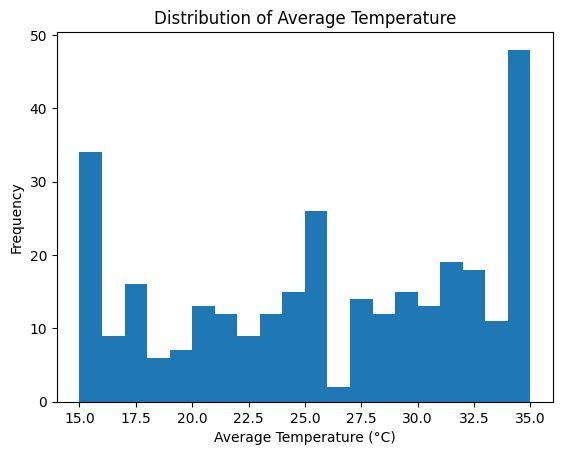

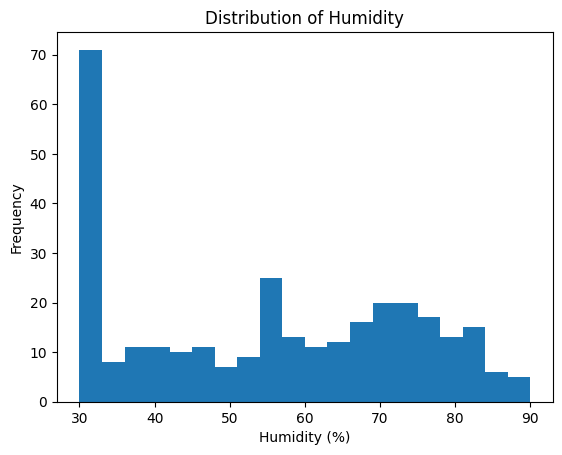

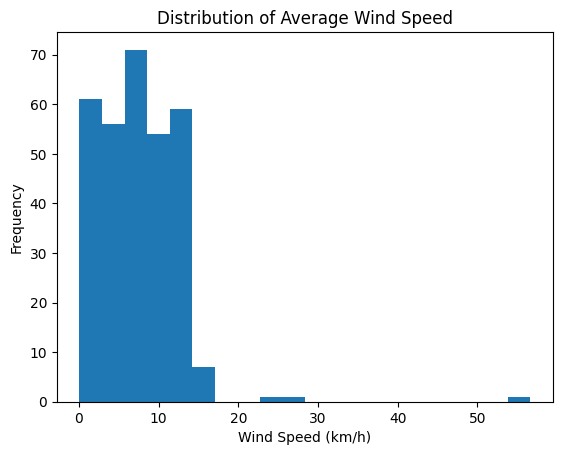

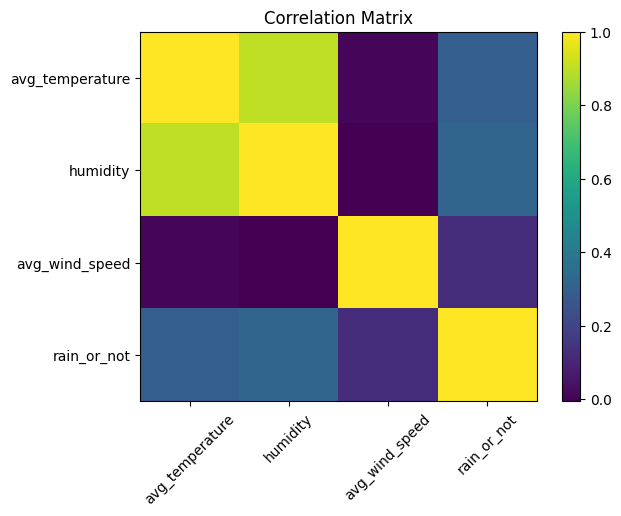


Correlation Matrix:
                 avg_temperature  humidity  avg_wind_speed  rain_or_not
avg_temperature         1.000000  0.902001        0.007954     0.294948
humidity                0.902001  1.000000       -0.006393     0.321914
avg_wind_speed          0.007954 -0.006393        1.000000     0.125754
rain_or_not             0.294948  0.321914        0.125754     1.000000


In [53]:
print("\nStatistical Summary:")
print(df.describe())

# Plot 1: avg_temperature distribution
plt.figure()
plt.hist(df['avg_temperature'], bins=20)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# Plot 2: humidity distribution
plt.figure()
plt.hist(df['humidity'], bins=20)
plt.title("Distribution of Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.show()

# Plot 3: avg_wind_speed distribution
plt.figure()
plt.hist(df['avg_wind_speed'], bins=20)
plt.title("Distribution of Average Wind Speed")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

# We can do a simple grouping or correlation analysis
correlation_matrix = df[['avg_temperature','humidity','avg_wind_speed','rain_or_not']].corr()

# Correlation Heatmap (using matplotlib)
plt.figure()
plt.imshow(correlation_matrix, cmap='viridis', aspect='auto')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.colorbar()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

In [54]:
X = df[['avg_temperature', 'humidity', 'avg_wind_speed']]
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=21, shuffle=False)
# If you want a random split ignoring the time factor, set e.g. test_size=0.2 and shuffle=True
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Train set size: 290, Test set size: 21


In [55]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_scaled, y_train)
y_pred_cat = cat_model.predict(X_test_scaled)
accuracy_cat = accuracy_score(y_test, y_pred_cat)

print("CatBoost Accuracy (default hyperparams):", accuracy_cat)
print("Classification Report:")
print(classification_report(y_test, y_pred_cat))

# 2. Hyperparameter tuning
cat_param_grid = {
    'depth': [4, 6, 8],
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
}
cat_search = GridSearchCV(
    estimator=CatBoostClassifier(verbose=0, random_state=42),
    param_grid=cat_param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
cat_search.fit(X_train_scaled, y_train)

print("\nBest Params for CatBoost:", cat_search.best_params_)
print("Best CV Score:", cat_search.best_score_)

# Evaluate best model on test set
best_cat = cat_search.best_estimator_
y_pred_best_cat = best_cat.predict(X_test_scaled)
accuracy_best_cat = accuracy_score(y_test, y_pred_best_cat)
print("\nCatBoost Test Accuracy (tuned):", accuracy_best_cat)
print("Classification Report:")
print(classification_report(y_test, y_pred_best_cat))

# 3. Probability of Rain
y_proba_cat = best_cat.predict_proba(X_test_scaled)[:, 1]

predictions_df_cat = pd.DataFrame({
    'date': df['date'].iloc[X_test.index],
    'actual_rain': y_test.values,
    'predicted_probability_rain': y_proba_cat
}).reset_index(drop=True)

print("\nPredicted Probability of Rain (CatBoost) for Test Days:")
print(predictions_df_cat)


CatBoost Accuracy (default hyperparams): 0.47619047619047616
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.30      0.35        10
           1       0.50      0.64      0.56        11

    accuracy                           0.48        21
   macro avg       0.46      0.47      0.46        21
weighted avg       0.47      0.48      0.46        21


Best Params for CatBoost: {'depth': 4, 'iterations': 200, 'learning_rate': 0.01}
Best CV Score: 0.634020618556701

CatBoost Test Accuracy (tuned): 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.56      0.82      0.67        11

    accuracy                           0.57        21
   macro avg       0.58      0.56      0.53        21
weighted avg       0.58      0.57      0.54        21


Predicted Probability of Rain (CatBoost) for Test Days:
          date 

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

for model_name, model_obj in models.items():
    model_obj.fit(X_train_scaled, y_train)
    y_pred = model_obj.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: LogisticRegression
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.61      1.00      0.76        11

    accuracy                           0.67        21
   macro avg       0.81      0.65      0.61        21
weighted avg       0.80      0.67      0.62        21

Confusion Matrix:
 [[ 3  7]
 [ 0 11]]

Model: DecisionTree
Accuracy: 0.47619047619047616
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.50      0.45      0.48        11

    accuracy                           0.48        21
   macro avg       0.48      0.48      0.48        21
weighted avg       0.48      0.48      0.48        21

Confusion Matrix:
 [[5 5]
 [6 5]]

Model: RandomForest
Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   su

In [58]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("\nBest Params for Random Forest:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred_best_rf = best_rf.predict(X_test_scaled)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"\nTest Accuracy (Tuned RF): {accuracy_best_rf}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Best Params for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.6341638029782359

Test Accuracy (Tuned RF): 0.5238095238095238
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.53      0.73      0.62        11

    accuracy                           0.52        21
   macro avg       0.52      0.51      0.50        21
weighted avg       0.52      0.52      0.50        21



In [59]:
final_model = best_rf

# Probability predictions for the test set (21 days)
y_proba_test = final_model.predict_proba(X_test_scaled)[:, 1]

# Display the predicted probabilities for each test sample
predictions_df = pd.DataFrame({
    'date': df['date'].iloc[X_test.index],
    'actual_rain': y_test.values,
    'predicted_probability_rain': y_proba_test
}).reset_index(drop=True)

print("\nPredicted Probability of Rain for Test Days:")
print(predictions_df)


Predicted Probability of Rain for Test Days:
          date  actual_rain  predicted_probability_rain
0   2023-10-18            1                    0.791249
1   2023-10-19            1                    0.804601
2   2023-10-20            1                    0.716980
3   2023-10-21            0                    0.790827
4   2023-10-22            1                    0.836611
5   2023-10-23            1                    0.791325
6   2023-10-24            1                    0.618873
7   2023-10-25            0                    0.746480
8   2023-10-26            1                    0.453075
9   2023-10-27            1                    0.341497
10  2023-10-28            0                    0.272027
11  2023-10-29            1                    0.289115
12  2023-10-30            0                    0.678706
13  2023-10-31            0                    0.709858
14  2023-11-01            1                    0.528265
15  2023-11-02            0                    0.247414
16